In [1]:
import csv

In [3]:
fprints = {}
with open('smiles_sub.csv','r') as f:
    reader = csv.reader(f)
    for line in reader:
        fprints[line[0]] = [int(i) for i in line[1:]]

In [5]:
import numpy as np

In [7]:
n_smiles = len(fprints)
n_f = 307 # we shall see
smiles_index = {}
smiles_pos = 0
fp_mat = np.zeros((n_smiles,n_f),np.int)
for smiles in fprints:
    smiles_index[smiles] = smiles_pos
    for col in fprints[smiles]:
        fp_mat[smiles_pos][col] = 1
    smiles_pos += 1

In [8]:
import pylab as plt
%matplotlib inline

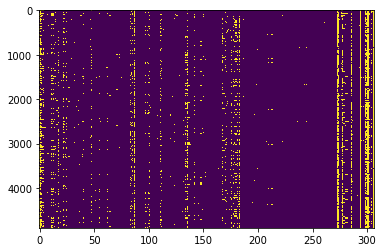

In [9]:
plt.imshow(fp_mat,aspect='auto')

In [12]:
substructures = []
with open('substructures.txt','r') as f:
    for line in f:
        substructures.append(line.strip())

In [17]:
s = fp_mat.sum(axis=0)
sub_count = []
for i,sub in enumerate(substructures):
    sub_count.append((sub,s[i]))
sub_count = sorted(sub_count,key = lambda x: x[1],reverse = True)
with open('sub_counts.csv','w') as f:
    writer = csv.writer(f,dialect='excel')
    for s,c in sub_count:
        writer.writerow([s,c])